#### Compare clustering vs original hand labels for BF data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from avgn.utils.paths import DATA_DIR, FIGURE_DIR

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
import hdbscan
import pandas as pd

In [4]:
from avgn.visualization.quickplots import draw_projection_plots
from avgn.utils.general import save_fig

In [21]:
DATASET_ID = 'koumura_bengalese_finch'

### load data

In [22]:
df_pickles = list((DATA_DIR / 'syllable_dfs' / DATASET_ID).glob('*.pickle'))

In [23]:
syllable_dfs = {}
for df_pickle in tqdm(df_pickles):
    syllable_dfs[df_pickle.stem] = pd.read_pickle(df_pickle)

In [24]:
syllable_dfs.keys()

dict_keys(['Bird4', 'Bird3', 'Bird1', 'Bird10', 'Bird9', 'Bird6', 'Bird5', 'bf', 'Bird0', 'Bird8', 'Bird2', 'Bird7'])

### look at an individual dataset

In [25]:
indv = 'Bird5'

In [26]:
syllable_df = syllable_dfs[indv]

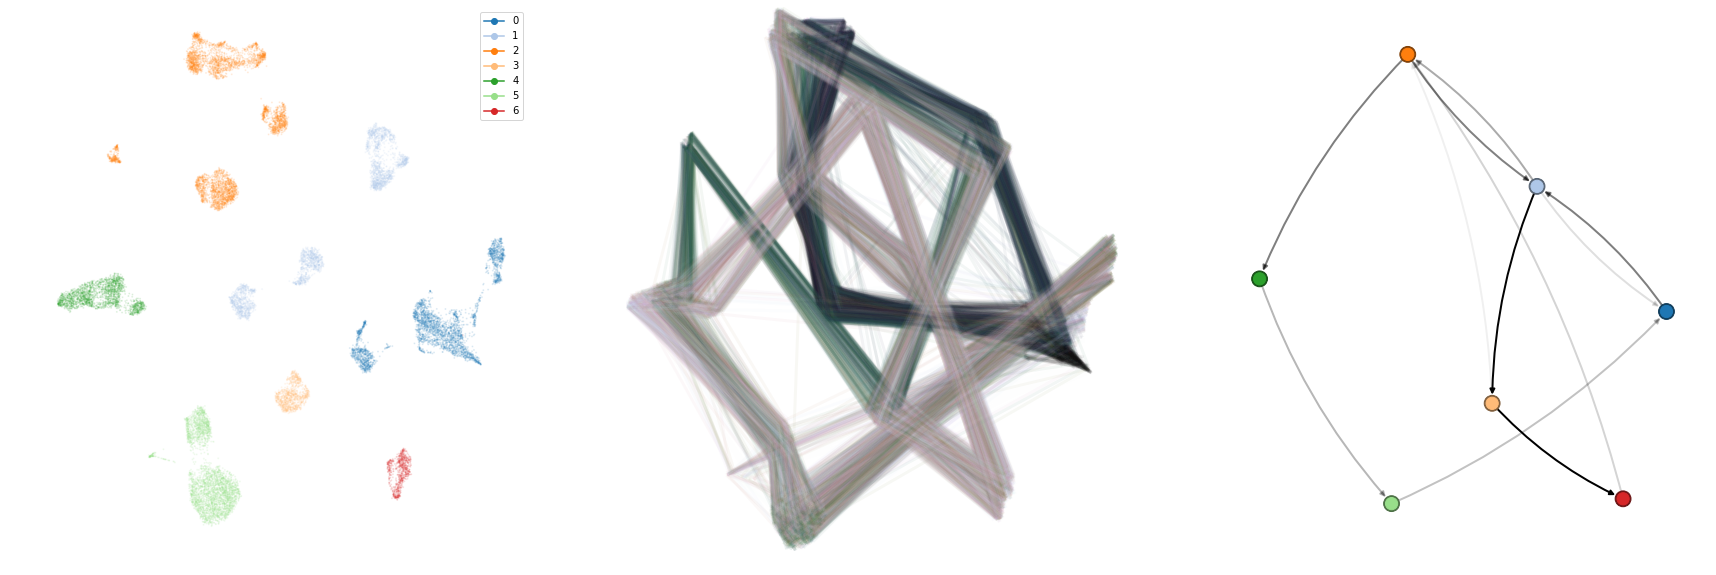

In [27]:
draw_projection_plots(syllable_dfs[indv])

### cluster label

In [28]:
data = np.array(list(syllable_df.umap.values))
np.shape(data)

(20524, 2)

In [29]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=int(len(data) * 0.001), # the smallest size we would expect a cluster to be
    min_samples=1, # larger values = more conservative clustering
)
clusterer.fit(data);

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [30]:
syllable_df['hdbscan_labels'] = clusterer.labels_

### Visualize clusters

In [31]:
projection_column = 'umap'

In [32]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
    plot_label_cluster_transitions
)
from avgn.visualization.network_graph import plot_network_graph

In [33]:
from avgn.visualization.network_graph import cluster_centers
from avgn.visualization.spectrogram import plot_example_specs

In [34]:
cluster_points = cluster_centers(syllable_df['syllables_labels'].values, np.array(list(syllable_df[projection_column].values)))

In [35]:
cluster_points_hdbscan = cluster_centers(syllable_df['hdbscan_labels'].values, np.array(list(syllable_df[projection_column].values)))

In [37]:
import seaborn as sns

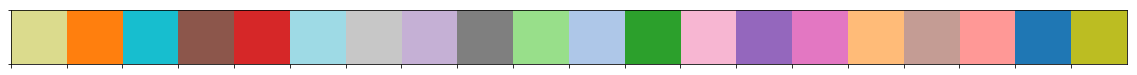

In [38]:
custom_pal = np.random.permutation(sns.color_palette("tab20", 20))
pal = custom_pal # "tab20"
sns.palplot(pal)

In [40]:
syllable_df[:2]

,syllables_sequence_id,syllables_sequence_pos,syllables_wav,syllables_rate,syllables_labels,syllables_spec,umap,hdbscan_labels
0,0,0,"[-0.00016788265506866094, 0.000414078927810685...",32000,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[14.517503, -2.984307]",19
1,0,1,"[-7.37732592910492e-07, 8.142910034559462e-05,...",32000,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[12.128155, -0.9842556]",19


In [42]:
label_of_interest = 0

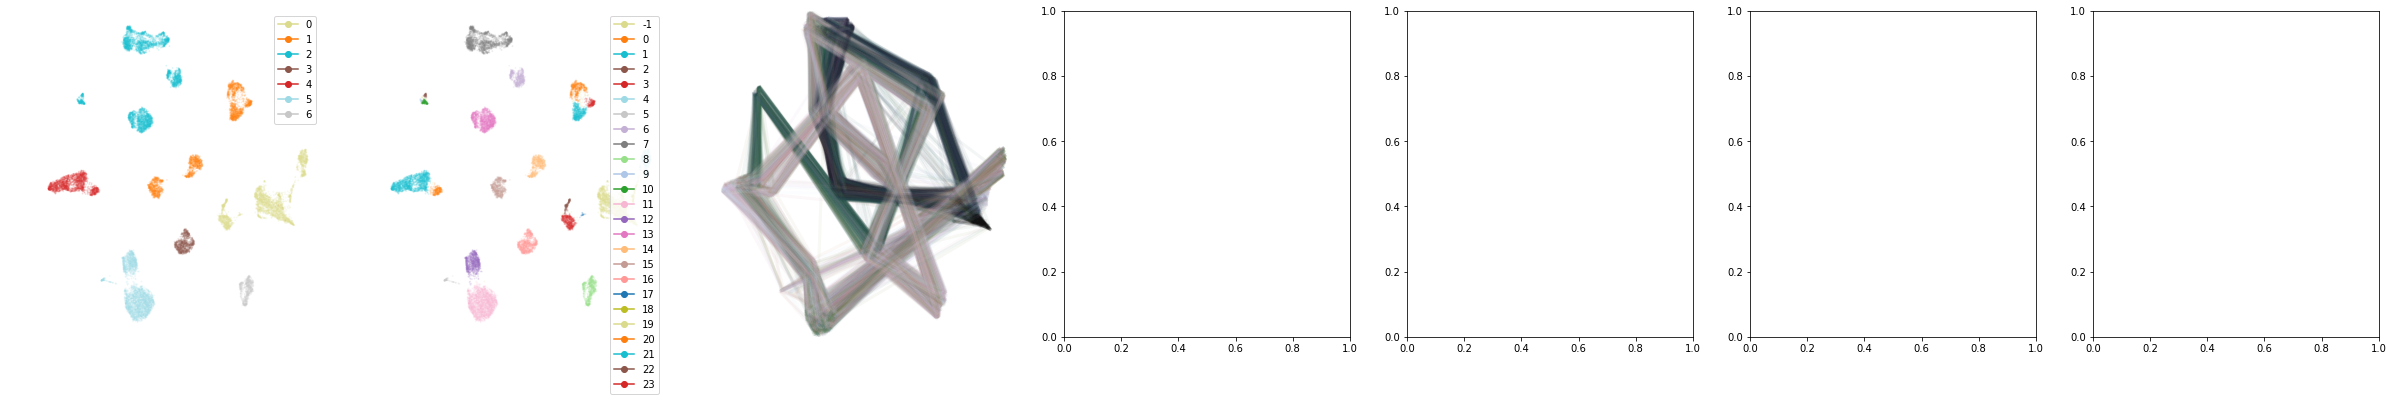

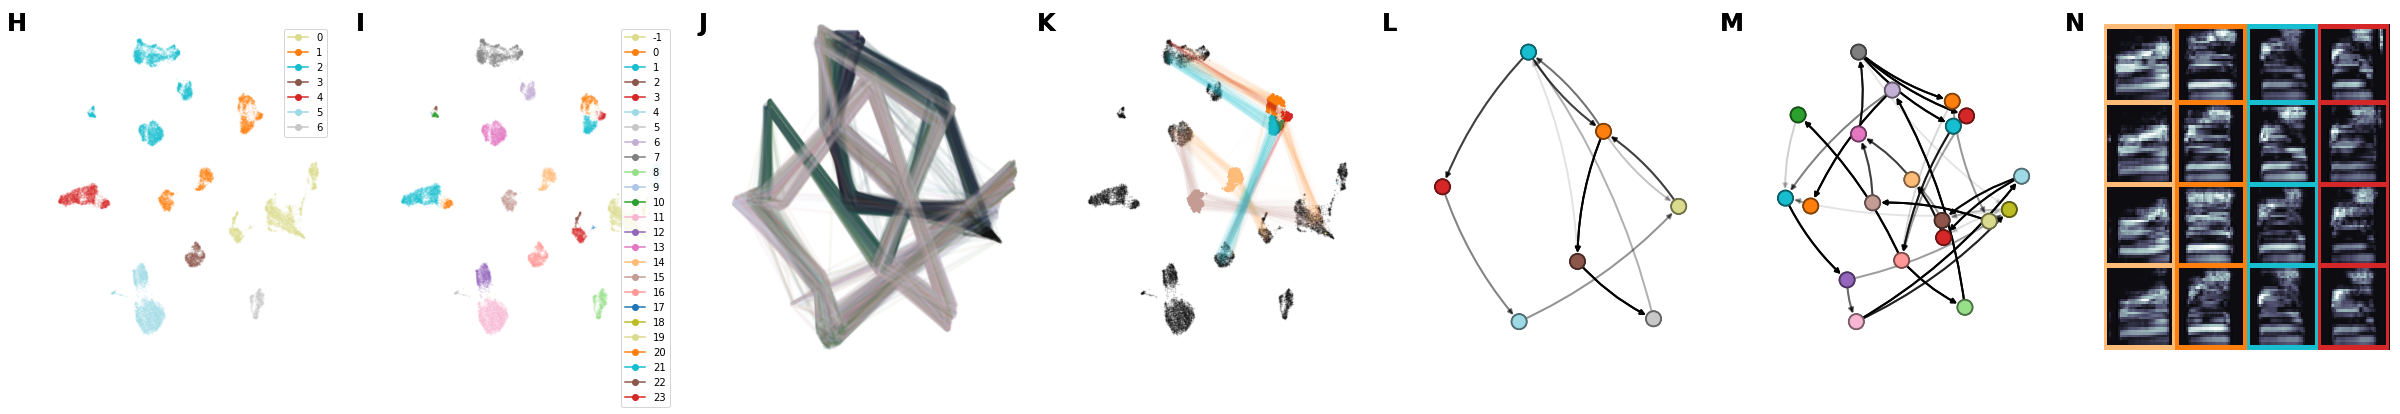

In [44]:
zoom = 6
ncols = 7
fig, axs = plt.subplots(ncols=ncols, figsize=(zoom * ncols, zoom))
ax = axs[0]
# plot scatter
scatter_projections(
    projection=np.array(list(syllable_df[projection_column].values)),
    labels=syllable_df["syllables_labels"].values,
    color_palette=pal,
    ax=ax,
)
ax.axis("off")
# for clus, loc in cluster_points.items():
#    ax.text(loc[0], loc[1], clus)

ax = axs[1]
# plot scatter
scatter_projections(
    projection=np.array(list(syllable_df[projection_column].values)),
    labels=syllable_df["hdbscan_labels"].values,
    color_palette=pal,
    ax=ax,
)

#for clus, loc in cluster_points_hdbscan.items():
#    ax.text(loc[0], loc[1], clus)

ax.axis("off")

# transition plot
ax = axs[2]
draw_projection_transitions(
    projections=np.array(list(syllable_df[projection_column].values)),
    sequence_ids=syllable_df["syllables_sequence_id"],
    sequence_pos=syllable_df["syllables_sequence_pos"],
    ax=ax,
)
ax.axis("off")

zoom = 6
ncols = 7
fig, axs = plt.subplots(ncols=ncols, figsize=(zoom * ncols, zoom))
ax = axs[0]
# plot scatter
scatter_projections(
    projection=np.array(list(syllable_df[projection_column].values)),
    labels=syllable_df["syllables_labels"].values,
    color_palette=pal,
    ax=ax,
)
ax.axis("off")
# for clus, loc in cluster_points.items():
#    ax.text(loc[0], loc[1], clus)

ax = axs[1]
# plot scatter
scatter_projections(
    projection=np.array(list(syllable_df[projection_column].values)),
    labels=syllable_df["hdbscan_labels"].values,
    color_palette=pal,
    ax=ax,
)

#for clus, loc in cluster_points_hdbscan.items():
#    ax.text(loc[0], loc[1], clus)

ax.axis("off")

# transition plot
ax = axs[2]
draw_projection_transitions(
    projections=np.array(list(syllable_df[projection_column].values)),
    sequence_ids=syllable_df["syllables_sequence_id"],
    sequence_pos=syllable_df["syllables_sequence_pos"],
    ax=ax,
)
ax.axis("off")

# transitions
ax = axs[3]
plot_label_cluster_transitions(
    syllable_df,
    label_of_interest,
    superlabel="syllables_labels",
    sublabel="hdbscan_labels",
    projection_column="umap",
    color_palette=pal,
    scatter_alpha=0.05,
    ax=ax,
)

ax.axis("off")

# network graph original
ax = axs[4]
label_column = "syllables_labels"
elements = syllable_df[label_column].values
projections = np.array(list(syllable_df[projection_column].values))
sequence_ids = np.array(syllable_df["syllables_sequence_id"])
plot_network_graph(
    elements,
    projections,
    sequence_ids,
    color_palette=pal,
    ax=ax,
    min_cluster_samples=100,
)

ax.axis("off")

# network graph HDBSCAN
ax = axs[5]
label_column = "hdbscan_labels"
elements = syllable_df[label_column].values
projections = np.array(list(syllable_df[projection_column].values))
sequence_ids = np.array(syllable_df["syllables_sequence_id"])
plot_network_graph(
    elements,
    projections,
    sequence_ids,
    color_palette=pal,
    ax=ax,
    min_cluster_samples=100,
)

ax.axis("off")

ax = axs[6]
plot_example_specs(
    specs=np.array(list(syllable_df.syllables_spec.values)),
    labels=np.array(list(syllable_df.hdbscan_labels.values)),
    clusters_to_viz=[14, 20, 21, 3],
    custom_pal = custom_pal, ax = ax, nex=4,line_width = 2
)

for ax, lab in zip(axs, ["H", "I", "J", "K", "L", "M", "N"]):
    ax.text(
        -.1,
        1,
        lab,
        transform = ax.transAxes,
        size=24,
        **{"ha": "center", "va": "center", "family": "sans-serif", "fontweight": "bold"}
    )
    

label_of_interest = '1'
# transitions
ax = axs[3]
plot_label_cluster_transitions(
    syllable_df,
    label_of_interest,
    superlabel="syllables_labels",
    sublabel="hdbscan_labels",
    projection_column="umap",
    color_palette=pal,
    scatter_alpha=0.05,
    ax=ax,
)

ax.axis("off")

# network graph original
ax = axs[4]
label_column = "syllables_labels"
elements = syllable_df[label_column].values
projections = np.array(list(syllable_df[projection_column].values))
sequence_ids = np.array(syllable_df["syllables_sequence_id"])
plot_network_graph(
    elements,
    projections,
    sequence_ids,
    color_palette=pal,
    ax=ax,
    min_cluster_samples=100,
)

ax.axis("off")

# network graph HDBSCAN
ax = axs[5]
label_column = "hdbscan_labels"
elements = syllable_df[label_column].values
projections = np.array(list(syllable_df[projection_column].values))
sequence_ids = np.array(syllable_df["syllables_sequence_id"])
plot_network_graph(
    elements,
    projections,
    sequence_ids,
    color_palette=pal,
    ax=ax,
    min_cluster_samples=100,
)

ax.axis("off")

ax = axs[6]
plot_example_specs(
    specs=np.array(list(syllable_df.syllables_spec.values)),
    labels=np.array(list(syllable_df.hdbscan_labels.values)),
    clusters_to_viz=[14, 20, 21, 3],
    custom_pal = custom_pal, ax = ax, nex=4,line_width = 2
)

for ax, lab in zip(axs, ["H", "I", "J", "K", "L", "M", "N"]):
    ax.text(
        -.1,
        1,
        lab,
        transform = ax.transAxes,
        size=24,
        **{"ha": "center", "va": "center", "family": "sans-serif", "fontweight": "bold"}
    )
    

#save_fig(FIGURE_DIR/'koumura_bf_transitions', save_pdf=False, save_svg=False)

In [ ]:
FIGURE_DIR